# Project1 _ 금리가 인상할때, 가격이 크게 올랐던 섹터 및 감소 했던 섹터는?


## 국채 10Y Rate 관찰

,Close
Date,
2016-10-01,1.424
2016-10-04,1.455
2016-10-05,1.511
2016-10-06,1.542
2016-10-07,1.530
...,...
2018-02-14,2.763
2018-02-15,2.752
2018-02-18,2.752


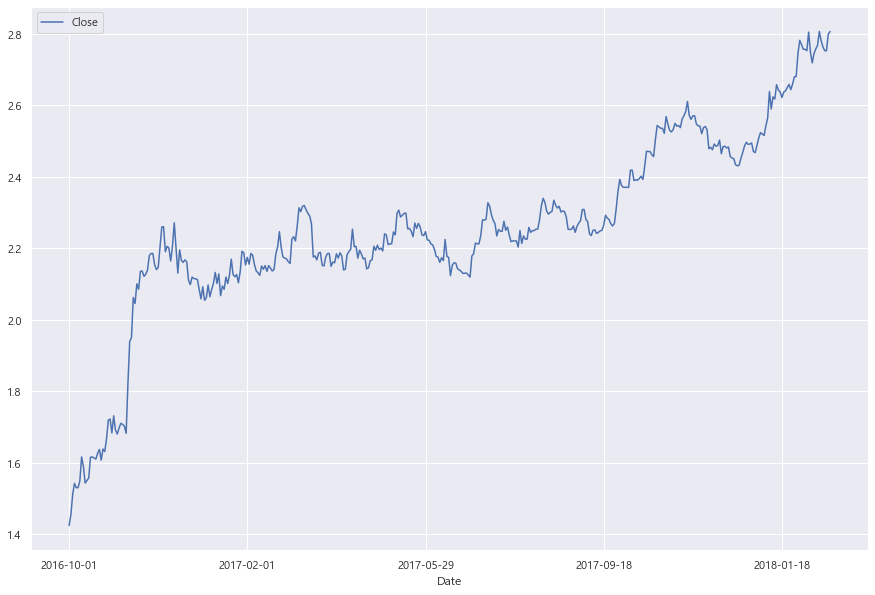

In [1]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

df_10Y_rate = pd.read_csv('10Y Rate.csv', index_col = 'Date')
df_10Y_rate_close = df_10Y_rate[['Close']]
df_10Y_rate_close

#df_10Y_rate_close.plot(figsize = (15, 10))

df_10Y_rate_close.min()

drop_index = df_10Y_rate_close['Close'].argmin()

df_10Y_rate_close = df_10Y_rate_close.drop(df_10Y_rate_close.index[drop_index], axis = 0)

#df_10Y_rate_close.plot(figsize = (15,10))
df_10Y_rate_close.loc['2016-10-01':'2018-02-20'].plot(figsize = (15,10))
df_10Y_rate_close_sample = df_10Y_rate_close.loc['2016-10-01':'2018-02-20']
df_10Y_rate_close_sample

## 분석할 섹터 고르기</br>

*** KODEX ETF DataFrame 만들기 </br>
*** krx_df에서 KODEX ETF만 뽑아내기</br>

In [2]:
krx_df = pd.read_csv("KRX.csv", encoding='cp949', index_col = 0)

'''
kodex_index= []

for i in range(krx_df.shape[0]):
    if 'KODEX' in krx_df['Name'].values[i]:
        kodex_index.append(i)
'''
kodex_index = [index for index in range(krx_df.shape[0]) if 'KODEX' in krx_df['Name'].values[index]]

kodex_etf_info = krx_df.iloc[kodex_index]
kodex_etf_info

kodex_etf_info.shape

# 섹터 고르기(20개)
sector_list = ['KODEX 200', 'KODEX IT', 'KODEX 건설', 'KODEX 게임산업', 'KODEX 경기소비재', 'KODEX 고배당', 'KODEX 골드선물(H)',
              'KODEX 구리선물(H)', 'KODEX 기계장비', 'KODEX 바이오', 'KODEX 반도체', 'KODEX 보험', 'KODEX 에너지화학', 'KODEX 운송',
              'KODEX 은행', 'KODEX 자동차', 'KODEX 증권', 'KODEX 철강', 'KODEX 필수소비재', 'KODEX 헬스케어']
len(sector_list)

20

## KODEX Sector DataFrame</br>


*** 위에서 선택한 Sector_list에 해당하는 KODEX Sector DF 만든다</br>
*** 관찰할 Sample DataFrame을 만든다</br>

In [3]:
kodex_etf_price_df = pd.read_csv('KODEX_ETF.csv', index_col = 'Date')
kodex_etf_price_df

# 참고
kodex_etf_info['Name'].isin(sector_list).sum()

kodex_etf_price_df

,KODEX 200,KODEX 200 중소형,KODEX 200ESG,KODEX 200IT TR,KODEX 200TR,KODEX 200exTOP,KODEX 200가치저변동,KODEX 200동일가중,KODEX 200롱코스닥150숏선물,KODEX 200미국채혼합,...,KODEX 코스피100,KODEX 코스피TR,KODEX 코스피대형주,KODEX 콩선물(H),KODEX 퀄리티Plus,KODEX 탄소효율그린뉴딜,KODEX 필수소비재,KODEX 한국대만IT프리미어,KODEX 헬스케어,KODEX 혁신기술테마액티브
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,20592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8840,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,21239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,21118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8960,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,21081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8995,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,20784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,13590.0,14300.0,13960.0,13070.0,13325.0,10925.0,11990.0,10305.0,13320.0,...,30660.0,13890.0,14075.0,11570,10355.0,9715.0,8370.0,20830.0,15875.0,13145.0
2021-12-24,40115,13745.0,14470.0,14135.0,13160.0,13425.0,10955.0,12070.0,10300.0,13340.0,...,30795.0,13960.0,14175.0,11525,10405.0,9790.0,8350.0,20855.0,15785.0,13210.0
2021-12-27,39880,13735.0,14385.0,14000.0,13100.0,13405.0,10925.0,12060.0,10180.0,13320.0,...,30630.0,13905.0,14095.0,11640,10475.0,9775.0,8350.0,21025.0,16015.0,13195.0


In [4]:
kodex_sector_df = kodex_etf_price_df[sector_list]
kodex_sector_df
kodex_sector_df.isna().sum(axis = 0)

KODEX 200           0
KODEX IT         1292
KODEX 건설            0
KODEX 게임산업       1614
KODEX 경기소비재      1292
KODEX 고배당        1425
KODEX 골드선물(H)       0
KODEX 구리선물(H)       0
KODEX 기계장비          0
KODEX 바이오        1075
KODEX 반도체           0
KODEX 보험            0
KODEX 에너지화학         0
KODEX 운송            0
KODEX 은행            0
KODEX 자동차           0
KODEX 증권            0
KODEX 철강            0
KODEX 필수소비재      1292
KODEX 헬스케어       1292
dtype: int64

In [5]:
kodex_sector_df.loc['2016-10-01':'2018-02-20'].isna().sum(axis = 0)

KODEX 200          0
KODEX IT         121
KODEX 건설           0
KODEX 게임산업       340
KODEX 경기소비재      121
KODEX 고배당        254
KODEX 골드선물(H)      0
KODEX 구리선물(H)      0
KODEX 기계장비         0
KODEX 바이오          0
KODEX 반도체          0
KODEX 보험           0
KODEX 에너지화학        0
KODEX 운송           0
KODEX 은행           0
KODEX 자동차          0
KODEX 증권           0
KODEX 철강           0
KODEX 필수소비재      121
KODEX 헬스케어       121
dtype: int64

In [6]:
# 날짜기간과 안 맞는 Sector을 분별한다

drop_list = ['KODEX 게임산업', 'KODEX 고배당', 'KODEX IT', 'KODEX 필수소비재', 'KODEX 헬스케어', 'KODEX 경기소비재']
kodex_sector_df = kodex_sector_df.drop(drop_list, axis = 1)
kodex_sector_df


,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,
2012-01-02,20592,5101,11975,7900,14745,NaN,13969,5784,9967,4966,5359,19290,4849,9084
2012-01-03,21239,5234,12110,7990,15434,NaN,14180,5862,10349,5117,5513,19829,5003,9348
2012-01-04,21118,5224,12170,8000,15539,NaN,14097,5877,10258,5141,5435,19936,5017,9528
2012-01-05,21081,5255,12380,7955,15419,NaN,14102,5889,10510,5131,5376,20051,5012,9605
2012-01-06,20784,5116,12390,7920,15203,NaN,13983,5784,10294,5047,5345,19657,4926,9433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,3375,12195,8085,5550,12315.0,38760,6545,18030,5755,7550,20925,8135,8530
2021-12-24,40115,3400,12200,8080,5530,12200.0,38700,6565,18235,5740,7565,21585,8175,8540
2021-12-27,39880,3350,12220,8010,5495,12340.0,38575,6580,18180,5660,7475,21460,8140,8480


In [7]:
kodex_sector_df_sample = kodex_sector_df.loc['2016-10-01':'2018-02-20']

kodex_sector_df_sample

,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,
2016-10-04,23289,2845,10025,4770,6055,9802.0,19328,7325,9433,3185,5319,16658,4840,8011
2016-10-05,23276,2832,9725,4730,6026,9627.0,19472,7200,9437,3175,5290,16668,4810,7904
2016-10-06,23436,2859,9705,4730,6142,9522.0,19386,7235,9352,3155,5319,16440,4794,7914
2016-10-07,23364,2874,9595,4675,6167,9143.0,19284,7217,9330,3155,5286,16389,4794,7790
2016-10-10,23402,2894,9685,4730,6182,9223.0,18959,7307,9398,3150,5410,16403,4832,7892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,28732,2765,9885,6405,5365,12392.0,25928,8496,12820,2973,8011,15281,7231,9678
2018-02-13,28954,2726,9910,6480,5185,12117.0,25938,8413,12839,2924,7993,15028,7066,9612
2018-02-14,29332,2765,9955,6560,5312,12492.0,26445,8399,12900,2958,7973,15084,7074,9664


## 국고채 10년 DataFrame과 KODEX Sector DataFrame의 Shape 비교</br>

*** 국고채 10년 DataFrame과 KODEX Sector DataFrame Index 비교하기</br>
*** 프로젝트에 필요한 새로운 DataFrame을 만든다

In [8]:
# DataFrame 비교
print(df_10Y_rate_close_sample.shape)
print(kodex_sector_df_sample.shape)

(428, 1)
(340, 14)


In [9]:
# 같은 날짜로 Sample 기간으로 만들었지만, 행의 갯수가 다르다

# Shape 맞추기
reindex_sample = df_10Y_rate_close_sample.index.isin(kodex_sector_df_sample.index)
reindex_sample
df_10Y_rate_close_resample = df_10Y_rate_close_sample[reindex_sample]
df_10Y_rate_close_resample.shape

(340, 1)

In [10]:
df_10Y_rate_close_resample.index == kodex_sector_df_sample.index
sum(df_10Y_rate_close_resample.index == kodex_sector_df_sample.index)

340

In [11]:
df = pd.DataFrame()

df['10Y Rate'] = df_10Y_rate_close_resample

df

,10Y Rate
Date,
2016-10-04,1.455
2016-10-05,1.511
2016-10-06,1.542
2016-10-07,1.530
2016-10-10,1.548
...,...
2018-02-12,2.806
2018-02-13,2.780
2018-02-14,2.763


In [12]:
for col in kodex_sector_df_sample.columns:
    df[col] = kodex_sector_df_sample[col]
    
df

,10Y Rate,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,,
2016-10-04,1.455,23289,2845,10025,4770,6055,9802.0,19328,7325,9433,3185,5319,16658,4840,8011
2016-10-05,1.511,23276,2832,9725,4730,6026,9627.0,19472,7200,9437,3175,5290,16668,4810,7904
2016-10-06,1.542,23436,2859,9705,4730,6142,9522.0,19386,7235,9352,3155,5319,16440,4794,7914
2016-10-07,1.530,23364,2874,9595,4675,6167,9143.0,19284,7217,9330,3155,5286,16389,4794,7790
2016-10-10,1.548,23402,2894,9685,4730,6182,9223.0,18959,7307,9398,3150,5410,16403,4832,7892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,2.806,28732,2765,9885,6405,5365,12392.0,25928,8496,12820,2973,8011,15281,7231,9678
2018-02-13,2.780,28954,2726,9910,6480,5185,12117.0,25938,8413,12839,2924,7993,15028,7066,9612
2018-02-14,2.763,29332,2765,9955,6560,5312,12492.0,26445,8399,12900,2958,7973,15084,7074,9664


In [13]:
# pd.concat으로 두개의 DataFrame을 합치는 방법(행의 갯수가 다르더라고)
df1 = pd.concat([df_10Y_rate_close_sample, kodex_sector_df_sample], axis = 1, join = 'inner')
df1

,Close,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,,
2016-10-04,1.455,23289,2845,10025,4770,6055,9802.0,19328,7325,9433,3185,5319,16658,4840,8011
2016-10-05,1.511,23276,2832,9725,4730,6026,9627.0,19472,7200,9437,3175,5290,16668,4810,7904
2016-10-06,1.542,23436,2859,9705,4730,6142,9522.0,19386,7235,9352,3155,5319,16440,4794,7914
2016-10-07,1.530,23364,2874,9595,4675,6167,9143.0,19284,7217,9330,3155,5286,16389,4794,7790
2016-10-10,1.548,23402,2894,9685,4730,6182,9223.0,18959,7307,9398,3150,5410,16403,4832,7892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,2.806,28732,2765,9885,6405,5365,12392.0,25928,8496,12820,2973,8011,15281,7231,9678
2018-02-13,2.780,28954,2726,9910,6480,5185,12117.0,25938,8413,12839,2924,7993,15028,7066,9612
2018-02-14,2.763,29332,2765,9955,6560,5312,12492.0,26445,8399,12900,2958,7973,15084,7074,9664


<AxesSubplot:xlabel='Date'>

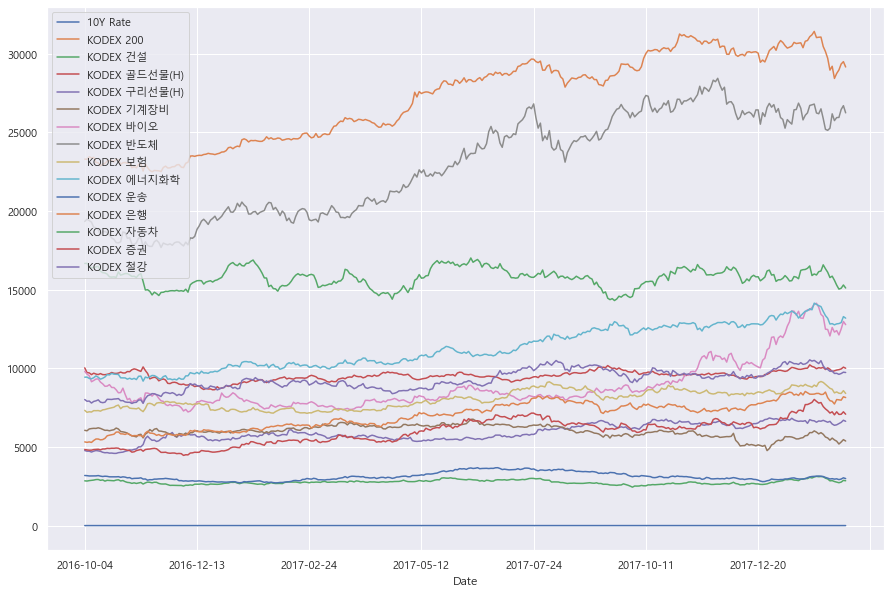

In [14]:
df.plot(figsize = (15,10))

## 분석1. Graph

In [15]:
df_set = df/df.iloc[0]*100
df_set

,10Y Rate,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,,
2016-10-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-10-05,103.848797,99.944180,99.543058,97.007481,99.161426,99.521057,98.214650,100.745033,98.293515,100.042404,99.686028,99.454785,100.060031,99.380165,98.664337
2016-10-06,105.979381,100.631199,100.492091,96.807980,99.161426,101.436829,97.143440,100.300083,98.771331,99.141312,99.058085,100.000000,98.691319,99.049587,98.789165
2016-10-07,105.154639,100.322040,101.019332,95.710723,98.008386,101.849711,93.276882,99.772351,98.525597,98.908089,99.058085,99.379583,98.385160,99.049587,97.241293
2016-10-10,106.391753,100.485208,101.722320,96.608479,99.161426,102.097440,94.093042,98.090853,99.754266,99.628962,98.901099,101.710848,98.469204,99.834711,98.514543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,192.852234,123.371549,97.188049,98.603491,134.276730,88.604459,126.423179,134.147351,115.986348,135.905862,93.343799,150.611017,91.733702,149.400826,120.808888
2018-02-13,191.065292,124.324789,95.817223,98.852868,135.849057,85.631709,123.617629,134.199089,114.853242,136.107283,91.805338,150.272608,90.214912,145.991736,119.985021
2018-02-14,189.896907,125.947872,97.188049,99.301746,137.526205,87.729149,127.443379,136.822227,114.662116,136.753949,92.872841,149.896597,90.551087,146.157025,120.634128


<AxesSubplot:xlabel='Date'>

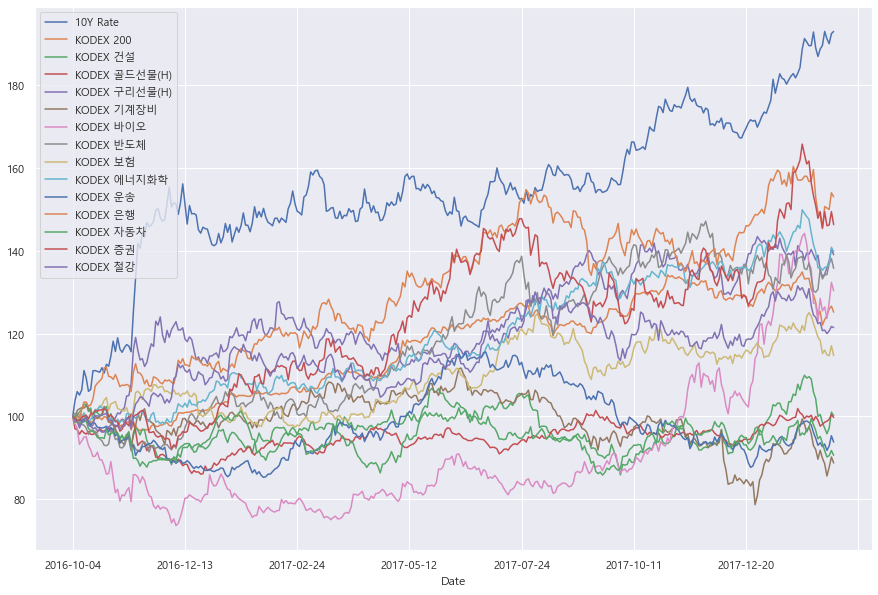

In [16]:
df_set.plot(figsize = (15,10))

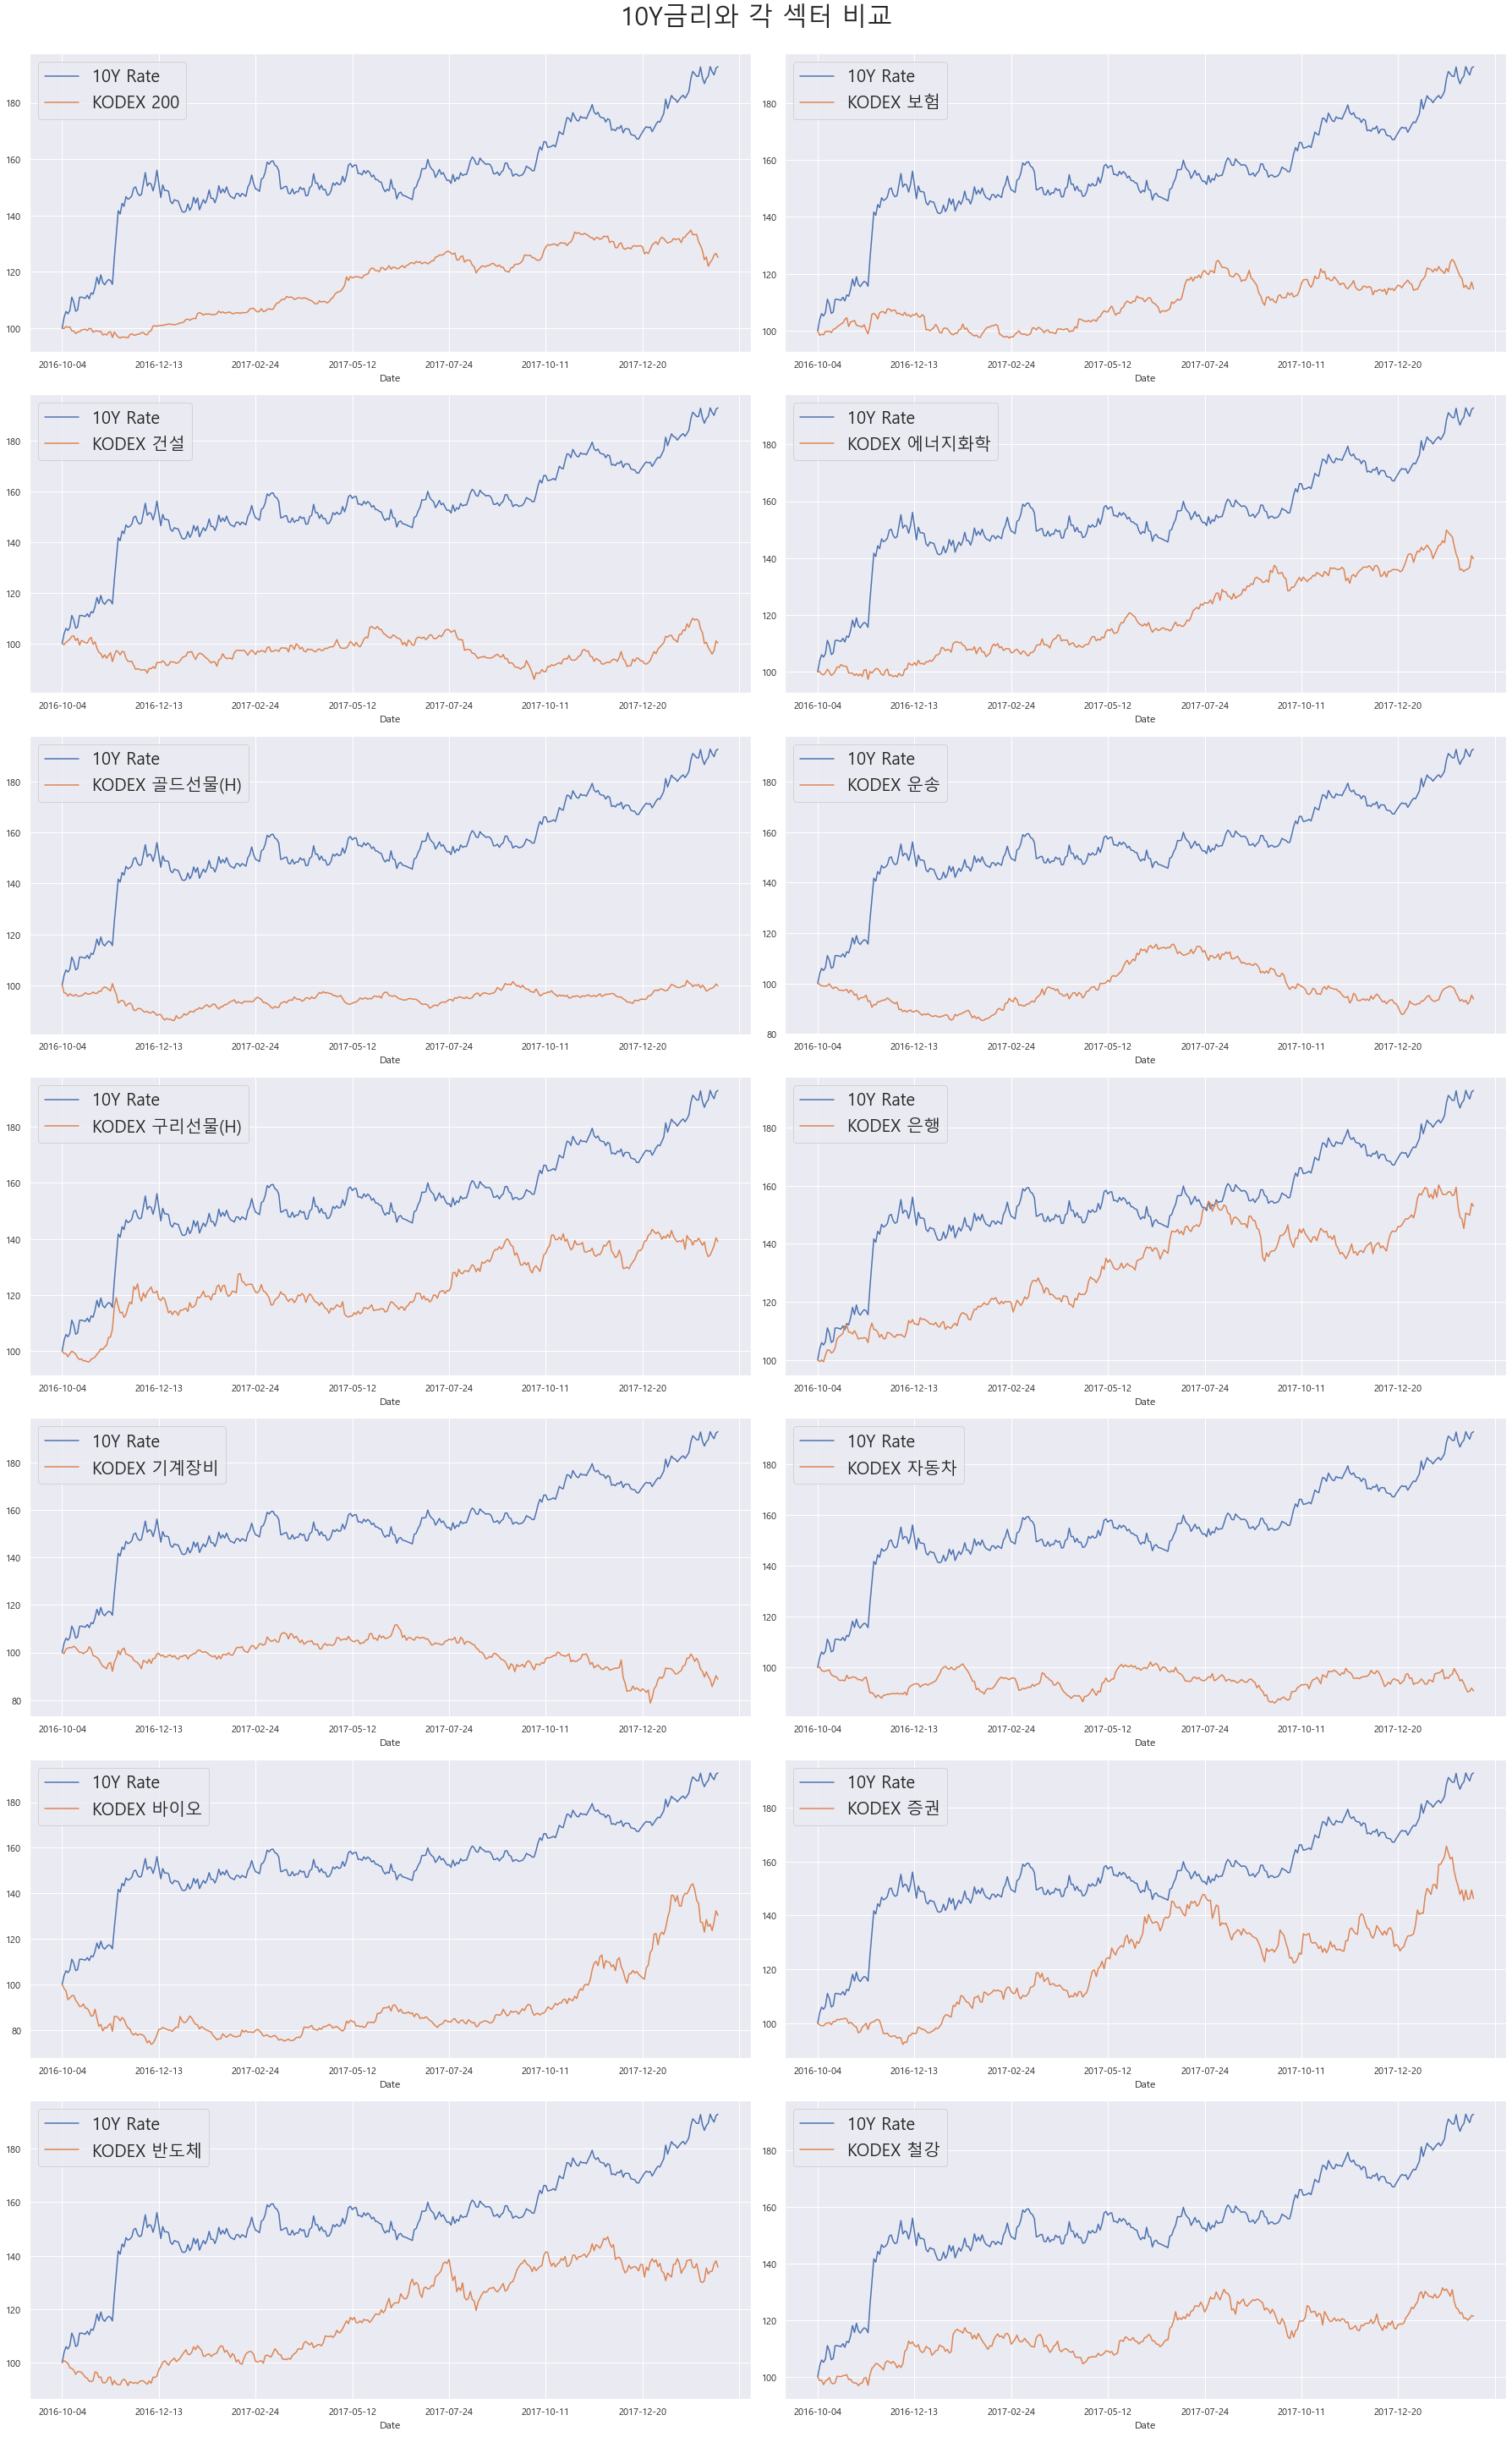

In [19]:
fig, axes = plt.subplots(nrows = 7, ncols=2, figsize=(25,40))
plt.rc('axes', unicode_minus = False)

col_index = 1

for col in range(2):
    
    for row in range(7):
        
        df_set['10Y Rate'].plot(ax = axes[row, col])
        df_set[df_set.columns[col_index]].plot(ax = axes[row, col])
        col_index+=1
        axes[row, col].legend(fontsize = 20)

fig.suptitle("10Y금리와 각 섹터 비교", fontsize=30, y=1)
#plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
fig.tight_layout()

## 분석2. Correlation & Return

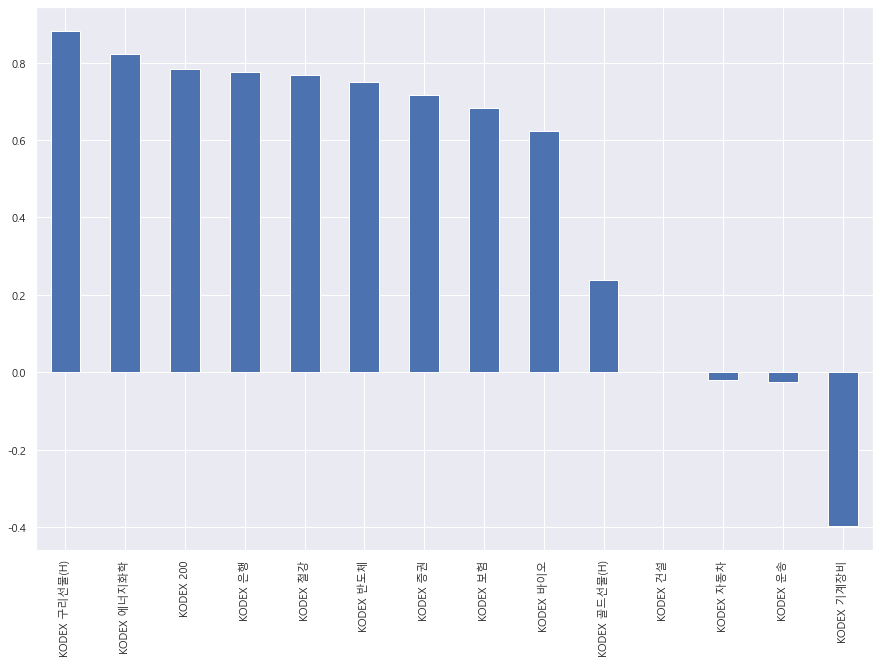

In [20]:
# 상관관계

df_corr = df_set.corr()['10Y Rate'][1:].sort_values(ascending = False)
df_corr

df_corr.plot.bar(figsize = (15,10))
plt.rc('axes', unicode_minus = False)


In [21]:
# Return

#df_set.iloc[df_set]
return_series = (df_set.iloc[df_set.shape[0]-1] - df_set.iloc[0])/df_set.iloc[0]
return_series.sort_values(ascending = False)

10Y Rate         0.928522
KODEX 은행         0.529799
KODEX 증권         0.462603
KODEX 에너지화학      0.397541
KODEX 구리선물(H)    0.389937
KODEX 반도체        0.357099
KODEX 바이오        0.302897
KODEX 200        0.251406
KODEX 철강         0.214455
KODEX 보험         0.146621
KODEX 건설         0.001757
KODEX 골드선물(H)   -0.002494
KODEX 운송        -0.061852
KODEX 자동차       -0.093589
KODEX 기계장비      -0.112304
dtype: float64

<AxesSubplot:xlabel='Date'>

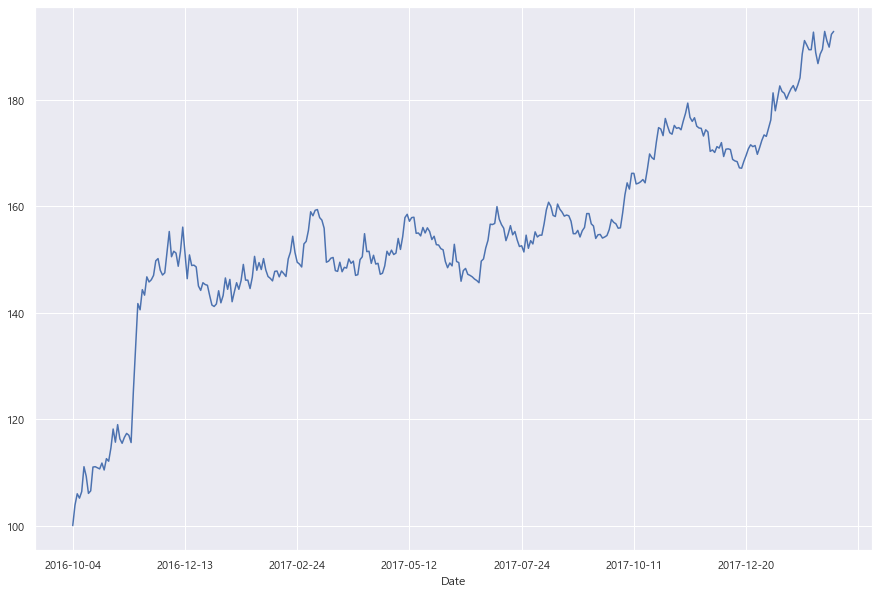

In [22]:
df_set['10Y Rate'].plot(figsize = (15,10))

In [23]:
return_sereis_1 = (df_set.loc['2016-12-13'] - df_set.iloc[0])/df_set.iloc[0]
return_sereis_1.sort_values(ascending=False )

10Y Rate         0.511340
KODEX 구리선물(H)    0.186583
KODEX 은행         0.124083
KODEX 철강         0.110848
KODEX 보험         0.054608
KODEX 에너지화학      0.032015
KODEX 200        0.009489
KODEX 기계장비      -0.004789
KODEX 반도체       -0.026180
KODEX 증권        -0.038430
KODEX 자동차       -0.065854
KODEX 건설        -0.074868
KODEX 운송        -0.111460
KODEX 골드선물(H)   -0.115212
KODEX 바이오       -0.197103
dtype: float64